<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Manipulation, EDA, and Reporting Results

_Authors: Joseph Nelson (DC), Sam Stack (DC)_

---

> **This lab is intentionally open-ended, and you're encouraged to answer your own questions about the dataset!**


### What makes a song a hit?

On next week's episode of the 'Are You Entertained?' podcast, we're going to be analyzing the latest generation's guilty pleasure- the music of the '00s. 

Our Data Scientists have poured through Billboard chart data to analyze what made a hit soar to the top of the charts, and how long they stayed there. Tune in next week for an awesome exploration of music and data as we continue to address an omnipresent question in the industry- why do we like what we like?

**Provide (at least) a markdown cell explaining your key learnings about top hits: what are they, what common themes are there, is there a trend among artists (type of music)?**

---

### Minimum Requirements

**At a minimum, you must:**

- Use Pandas to read in your data
- Rename column names where appropriate
- Describe your data: check the value counts and descriptive statistics
- Make use of groupby statements
- Utilize Boolean sorting
- Assess the validity of your data (missing data, distributions?)

**You should strive to:**

- Produce a blog-post ready description of your lab
- State your assumptions about the data
- Describe limitations
- Consider how you can action this from a stakeholder perspective (radio, record label, fan)
- Include visualizations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Billboard data CSV:
billboard_csv = './datasets/billboard.csv'

# We need to use encoding='latin-1' to deal with non-ASCII characters.
music = pd.read_csv(billboard_csv, encoding='latin-1')

In [2]:
music.isnull().sum()

year                 0
artist.inverted      0
track                0
time                 0
genre                0
date.entered         0
date.peaked          0
x1st.week            0
x2nd.week            5
x3rd.week           10
x4th.week           17
x5th.week           25
x6th.week           37
x7th.week           48
x8th.week           57
x9th.week           64
x10th.week          73
x11th.week          81
x12th.week          95
x13th.week         107
x14th.week         113
x15th.week         120
x16th.week         135
x17th.week         140
x18th.week         151
x19th.week         161
x20th.week         171
x21st.week         252
x22nd.week         262
x23rd.week         269
                  ... 
x47th.week         312
x48th.week         313
x49th.week         313
x50th.week         313
x51st.week         313
x52nd.week         313
x53rd.week         313
x54th.week         315
x55th.week         315
x56th.week         315
x57th.week         315
x58th.week         315
x59th.week 

In [3]:
music.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       '

In [9]:
music.shape

(317, 83)

In [11]:
music.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
week = 1
week_list = []
while week < 77:
    week_num = 'week_'+str(week)
    week_list.append(week_num)
    week += 1

In [5]:
names = ['year','artist','track', 'length','genre','first_apperence','highest_data']

for i in week_list:
    names.append(i)

In [6]:
music.columns = names

In [7]:
music.columns

Index(['year', 'artist', 'track', 'length', 'genre', 'first_apperence',
       'highest_data', 'week_1', 'week_2', 'week_3', 'week_4', 'week_5',
       'week_6', 'week_7', 'week_8', 'week_9', 'week_10', 'week_11', 'week_12',
       'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_18',
       'week_19', 'week_20', 'week_21', 'week_22', 'week_23', 'week_24',
       'week_25', 'week_26', 'week_27', 'week_28', 'week_29', 'week_30',
       'week_31', 'week_32', 'week_33', 'week_34', 'week_35', 'week_36',
       'week_37', 'week_38', 'week_39', 'week_40', 'week_41', 'week_42',
       'week_43', 'week_44', 'week_45', 'week_46', 'week_47', 'week_48',
       'week_49', 'week_50', 'week_51', 'week_52', 'week_53', 'week_54',
       'week_55', 'week_56', 'week_57', 'week_58', 'week_59', 'week_60',
       'week_61', 'week_62', 'week_63', 'week_64', 'week_65', 'week_66',
       'week_67', 'week_68', 'week_69', 'week_70', 'week_71', 'week_72',
       'week_73', 'week_74', 'week_75', 'week

In [8]:
drop_list = music.iloc[0:0, 72:83]
music.drop(drop_list, axis=1, inplace=True)

In [9]:
music.columns

Index(['year', 'artist', 'track', 'length', 'genre', 'first_apperence',
       'highest_data', 'week_1', 'week_2', 'week_3', 'week_4', 'week_5',
       'week_6', 'week_7', 'week_8', 'week_9', 'week_10', 'week_11', 'week_12',
       'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_18',
       'week_19', 'week_20', 'week_21', 'week_22', 'week_23', 'week_24',
       'week_25', 'week_26', 'week_27', 'week_28', 'week_29', 'week_30',
       'week_31', 'week_32', 'week_33', 'week_34', 'week_35', 'week_36',
       'week_37', 'week_38', 'week_39', 'week_40', 'week_41', 'week_42',
       'week_43', 'week_44', 'week_45', 'week_46', 'week_47', 'week_48',
       'week_49', 'week_50', 'week_51', 'week_52', 'week_53', 'week_54',
       'week_55', 'week_56', 'week_57', 'week_58', 'week_59', 'week_60',
       'week_61', 'week_62', 'week_63', 'week_64', 'week_65'],
      dtype='object')

In [10]:
# number of weeks track had ratings
music[music.columns[7:77]].count(axis=1)

0      28
1      26
2      33
3      24
4      21
5      24
6      32
7      20
8      26
9      55
10     25
11     24
12     41
13     47
14     32
15     39
16     20
17     53
18     30
19     28
20     37
21     32
22     20
23     32
24     53
25     28
26     22
27     28
28     44
29     32
       ..
287     3
288    20
289     5
290    18
291     3
292     9
293     6
294     5
295    12
296     6
297     7
298     4
299     4
300     8
301     3
302     4
303     7
304     5
305     5
306     3
307     3
308     3
309     2
310     2
311     1
312     1
313     4
314     2
315     2
316     1
Length: 317, dtype: int64

In [11]:
music['weeks_active'] = music[music.columns[7:77]].count(axis=1)

In [12]:
music.columns

Index(['year', 'artist', 'track', 'length', 'genre', 'first_apperence',
       'highest_data', 'week_1', 'week_2', 'week_3', 'week_4', 'week_5',
       'week_6', 'week_7', 'week_8', 'week_9', 'week_10', 'week_11', 'week_12',
       'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_18',
       'week_19', 'week_20', 'week_21', 'week_22', 'week_23', 'week_24',
       'week_25', 'week_26', 'week_27', 'week_28', 'week_29', 'week_30',
       'week_31', 'week_32', 'week_33', 'week_34', 'week_35', 'week_36',
       'week_37', 'week_38', 'week_39', 'week_40', 'week_41', 'week_42',
       'week_43', 'week_44', 'week_45', 'week_46', 'week_47', 'week_48',
       'week_49', 'week_50', 'week_51', 'week_52', 'week_53', 'week_54',
       'week_55', 'week_56', 'week_57', 'week_58', 'week_59', 'week_60',
       'week_61', 'week_62', 'week_63', 'week_64', 'week_65', 'weeks_active'],
      dtype='object')

In [13]:
# artist at the top of the charts
music['artist'].value_counts().head()

Jay-Z                5
Dixie Chicks, The    4
Houston, Whitney     4
Jackson, Alan        3
Thomas, Carl         3
Name: artist, dtype: int64

In [49]:
music['genre'].value_counts()

Rock           137
Country         74
Rap             58
R&B             23
Latin            9
Pop              9
Electronica      4
Reggae           1
Jazz             1
Gospel           1
Name: genre, dtype: int64

In [14]:
# Getting a dataframe that will only be used for a plot
plot_frame = music[['genre','weeks_active']]

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:195: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


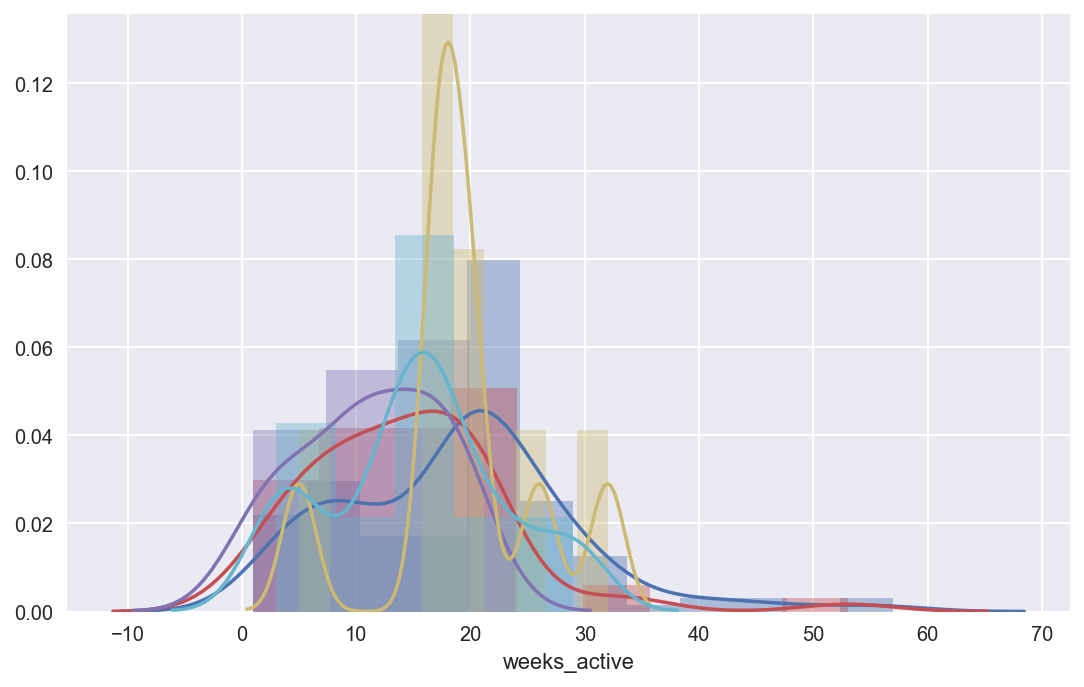

In [15]:
# Stacking distribution of of songs lifes grouped by genre(color) 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
genres = ['Rock','Counntry','Rap','R&B','Latin','Pop']

for genre_type in genres:
    sub_df = plot_frame[plot_frame['genre'] == genre_type]
    sns.distplot(sub_df['weeks_active'])

plt.show()

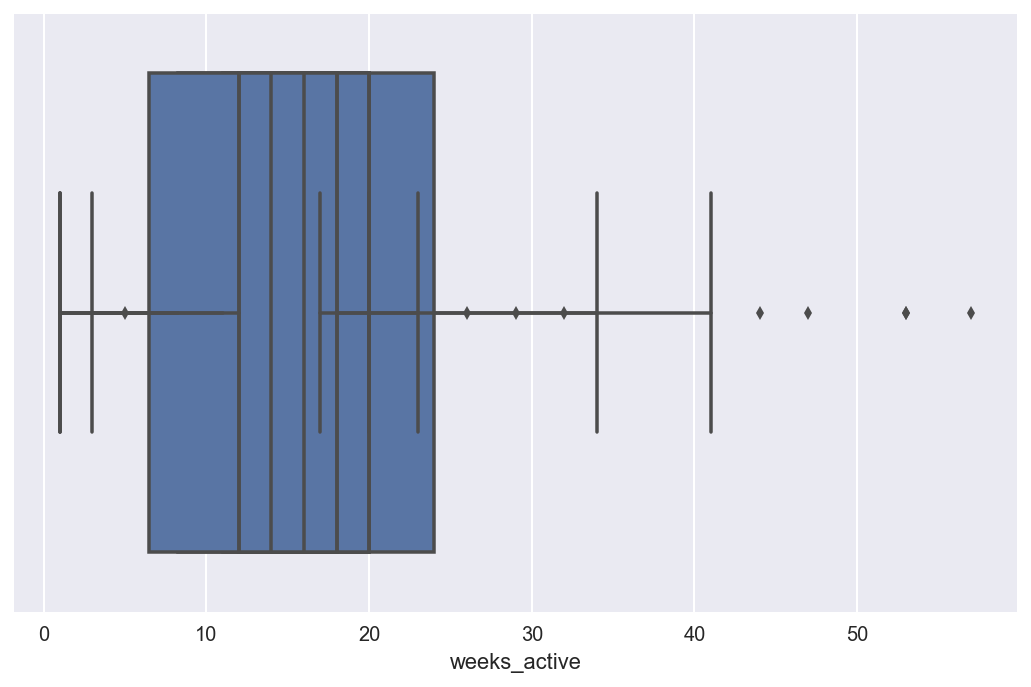

In [16]:
plt.style.use('seaborn')
genres = ['Rock','Counntry','Rap','R&B','Latin','Pop']

for genre_type in genres:
    sub_df = plot_frame[plot_frame['genre'] == genre_type]
    sns.boxplot(sub_df['weeks_active'])

plt.show()

In [17]:
music2 = music.fillna(value=0)

In [61]:
music[['track','weeks_active']].head()

,track,weeks_active
0,Independent Women Part I,28
1,"Maria, Maria",26
2,I Knew I Loved You,33
3,Music,24
4,Come On Over Baby (All I Want Is You),21


In [18]:
music['average_weekly_rating'] = music2[music2.columns[7:73]].sum(axis =1)/music2['weeks_active']

In [19]:
music.average_weekly_rating.sort_values().tail()

310     99.5
313    100.0
314    100.0
315    100.0
316    100.0
Name: average_weekly_rating, dtype: float64

In [20]:
music.groupby('genre')['average_weekly_rating'].mean()

genre
Country        67.690659
Electronica    66.170833
Gospel         68.750000
Jazz           52.800000
Latin          53.133637
Pop            65.055007
R&B            75.677187
Rap            68.915707
Reggae         73.400000
Rock           53.941287
Name: average_weekly_rating, dtype: float64

In [24]:
music['median_weekly_rating'] = music[music.columns[7:73]].median(axis=1)

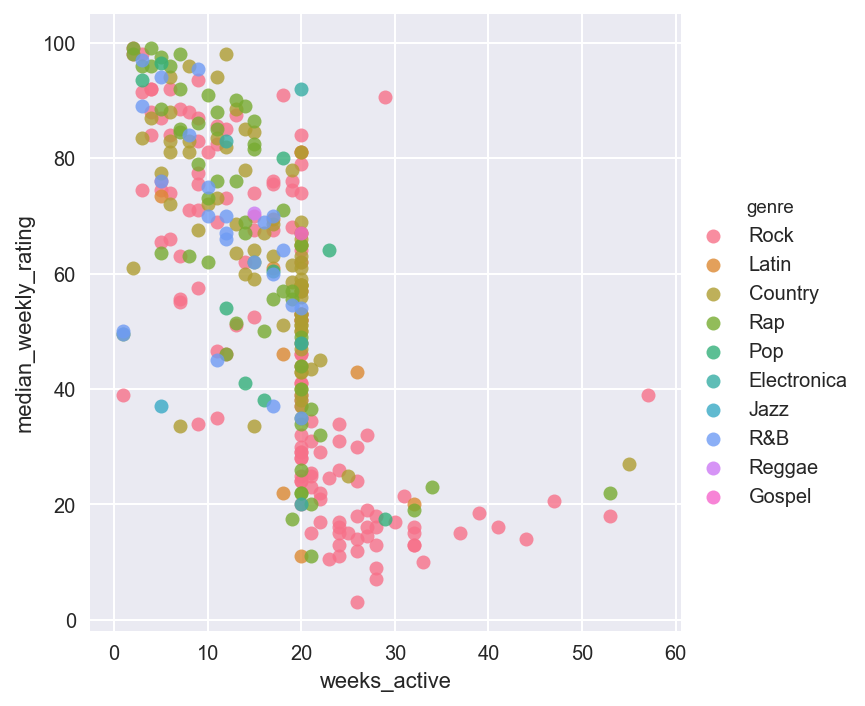

In [29]:
# sns.lmplot(x = 'weeks_active',y ='avg_weekly_rating', hue = 'genre', data = music, fit_reg=False);
sns.lmplot(x='weeks_active',y='median_weekly_rating',hue='genre',data=music,fit_reg=False)